In [2]:
# calling database form csv

import pandas as pd
import sys, os
# sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))


db = pd.read_csv('../../data/database/database.csv')
db.head()

,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,...,P[bar],Te_mean[K],Tc_mean[K],Te_std[K],Tc_std[K],T_pulse[K],TR[K/W],GFE_Te[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,14:20:49,04/06/2024,35.5,35.7,35.2,35.2,35.5,33.4,33.1,33.1,...,0.37,308.57,305.65,273.37,274.56,0.0,0.07,-2563.12,-2538.87,-24.25
1,14:20:51,04/06/2024,35.5,35.7,35.2,35.2,35.5,33.4,33.1,33.1,...,0.37,308.57,305.65,273.37,274.56,0.0,0.07,-2563.12,-2538.87,-24.25
2,14:20:52,04/06/2024,35.5,35.7,35.2,35.2,35.5,33.4,33.1,33.1,...,0.37,308.57,305.65,273.37,274.56,0.0,0.07,-2563.12,-2538.87,-24.25
3,14:20:54,04/06/2024,35.5,35.7,35.2,35.2,35.5,33.4,33.1,33.1,...,0.37,308.57,305.65,273.37,274.56,0.0,0.07,-2563.12,-2538.87,-24.25
4,14:20:55,04/06/2024,35.5,35.7,35.2,35.2,35.5,33.4,33.1,33.1,...,0.37,308.57,305.67,273.37,274.51,0.0,0.07,-2563.12,-2539.08,-24.05


In [3]:
db.columns

Index(['TIME', 'DATE', 'TC_1', 'TC_2', 'TC_3', 'TC_4', 'TC_5', 'TC_6', 'TC_7',
       'TC_8', 'TC_9', 'PRESSURE', 'HEATER', 'HEATER SET POINT', 'date',
       'voltage', 'current', 'power', 'WF', 'FR[%]', 'Q[W]', 'alpha', 'beta',
       'pulse', 'Te_mean[C]', 'Tc_mean[C]', 'Te_std[C]', 'Tc_std[C]', 'P[bar]',
       'Te_mean[K]', 'Tc_mean[K]', 'Te_std[K]', 'Tc_std[K]', 'T_pulse[K]',
       'TR[K/W]', 'GFE_Te[KJ/mol]', 'GFE_Tc[KJ/mol]', 'dG[KJ/mol]'],
      dtype='object')

In [4]:
df_FR60_Q100 = db[(db['FR[%]'] == 60) & (db['Q[W]'] == 120)]
df_FR60_Q100

,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,...,P[bar],Te_mean[K],Tc_mean[K],Te_std[K],Tc_std[K],T_pulse[K],TR[K/W],GFE_Te[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]


In [5]:

# from zenml.client import Client

# artifact = Client().get_artifact_version('909b4d1a-4555-4310-92f4-3a213e7573b9')
# df = artifact.load()

In [6]:
df = db.copy()

Matplotlib is building the font cache; this may take a moment.


FR 40
Q 40
alpha 90, beta 0
Q 60
alpha 90, beta 0
Q 80
alpha 90, beta 0
Q 100
alpha 90, beta 0
Q 120
alpha 90, beta 0


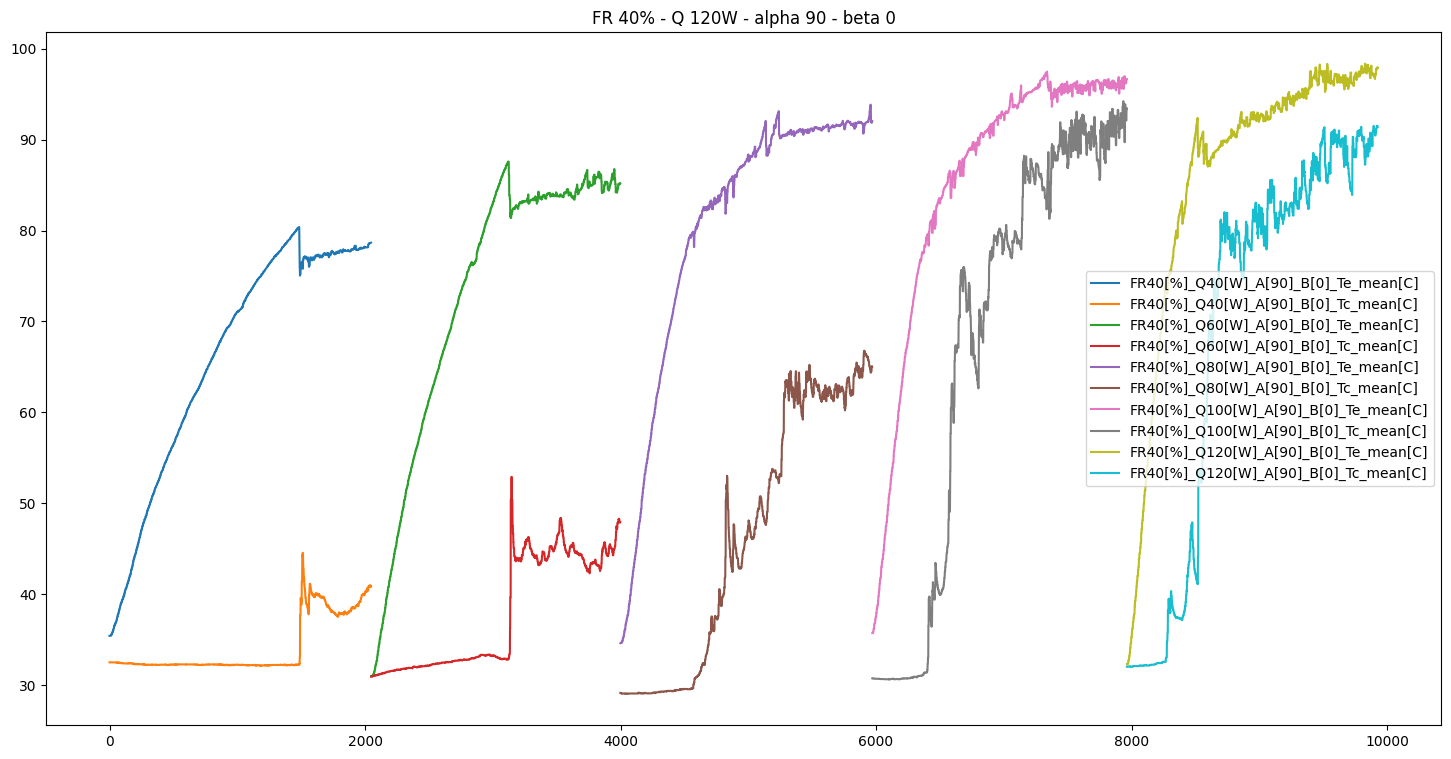

In [7]:
frs = df['FR[%]'].unique()
qs = df['Q[W]'].unique()
alphas = df['alpha'].unique()
betas = df['beta'].unique()
betas

import matplotlib.pyplot as plt

# Assuming frs, qs, alphas, betas are defined and df is your DataFrame
plt.figure(figsize=(18, 9))
for fr in frs:
    print(f'FR {fr}')
    for q in qs:
        print(f'Q {q}')
        for a in alphas:
            for b in betas:
                print(f'alpha {a}, beta {b}')
                
                # Filter the dataframe
                df_ = df[(df['FR[%]'] == fr) & (df['Q[W]'] == q) & (df['alpha'] == a) & (df['beta'] == b)]
                # df_.reset_index(inplace=True)
                
                if not df_.empty:
                    # Plotting
                    # plt.figure(figsize=(18, 6))
                    plt.plot(df_['Te_mean[C]'], label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Te_mean[C]')
                    plt.plot(df_['Tc_mean[C]'], label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Tc_mean[C]')
# change intend and it will change different overlapping of the graphs
plt.legend()
plt.title(f'FR {fr}% - Q {q}W - alpha {a} - beta {b}')
plt.show()


In [8]:
df

,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,...,P[bar],Te_mean[K],Tc_mean[K],Te_std[K],Tc_std[K],T_pulse[K],TR[K/W],GFE_Te[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,14:20:49,04/06/2024,35.5,35.7,35.2,35.2,35.5,33.4,33.1,33.1,...,0.37,308.57,305.65,273.37,274.56,0.0,0.07,-2563.12,-2538.87,-24.25
1,14:20:51,04/06/2024,35.5,35.7,35.2,35.2,35.5,33.4,33.1,33.1,...,0.37,308.57,305.65,273.37,274.56,0.0,0.07,-2563.12,-2538.87,-24.25
2,14:20:52,04/06/2024,35.5,35.7,35.2,35.2,35.5,33.4,33.1,33.1,...,0.37,308.57,305.65,273.37,274.56,0.0,0.07,-2563.12,-2538.87,-24.25
3,14:20:54,04/06/2024,35.5,35.7,35.2,35.2,35.5,33.4,33.1,33.1,...,0.37,308.57,305.65,273.37,274.56,0.0,0.07,-2563.12,-2538.87,-24.25
4,14:20:55,04/06/2024,35.5,35.7,35.2,35.2,35.5,33.4,33.1,33.1,...,0.37,308.57,305.67,273.37,274.51,0.0,0.07,-2563.12,-2539.08,-24.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9923,11:19:50,04/09/2024,95.9,99.3,99.7,97.0,97.2,82.8,91.1,91.3,...,1.79,370.97,364.67,274.77,280.55,0.0,0.05,1761.02,1731.14,29.88
9924,11:19:57,04/09/2024,95.9,99.3,99.7,97.0,97.2,82.8,91.1,91.2,...,1.80,370.97,364.65,274.77,280.55,0.0,0.05,1778.18,1747.88,30.29
9925,11:19:58,04/09/2024,95.9,99.6,99.8,97.3,97.2,82.8,91.1,91.2,...,1.80,371.11,364.65,274.83,280.55,0.0,0.05,1778.85,1747.88,30.96
9926,11:19:59,04/09/2024,95.9,99.6,99.8,97.3,97.0,82.6,91.0,91.2,...,1.80,371.07,364.58,274.86,280.63,0.0,0.05,1778.66,1747.52,31.13


In [9]:
df.select_dtypes(include='object').columns.to_list()

['TIME', 'DATE', 'date', 'WF', 'pulse']

In [10]:
# Ensure Te_mean[C] and Tc_mean[C] are numeric
df['Te_mean[C]'] = pd.to_numeric(df['Te_mean[C]'], errors='coerce')
df['Tc_mean[C]'] = pd.to_numeric(df['Tc_mean[C]'], errors='coerce')

# Identify the object column automatically
object_column = df.select_dtypes(include='object').columns

# df_n = df.drop(columns=df.select_dtypes(include='object').columns, inplace=True)


# # Group by 'Te_mean[C]' and calculate the mean of numeric columns
df_numeric_mean = df.drop(columns=object_column)\
                    .groupby('Te_mean[C]')\
                    .agg('mean')

# # Extract the first value of the identified object column for each group
df_object = df.groupby('Te_mean[C]')[object_column].first()

# # Combine the mean numeric columns with the object column
df_mean = pd.concat([df_numeric_mean, df_object], axis=1).reset_index()
# df.drop(columns=df.select_dtypes(include='object').columns, inplace=True)
# # df.reset_index(inplace=True)
# df_mean = df.sort_values('Te_mean[C]').groupby(['Te_mean[C]'], as_index=False).mean()

df_mean

,Te_mean[C],TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,TC_9,...,T_pulse[K],TR[K/W],GFE_Te[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol],TIME,DATE,date,WF,pulse
0,30.98,30.90,31.20,30.9,30.80,31.10,31.40,31.30,31.300000,29.700000,...,0.0,0.000,-2268.660000,-2268.250000,-0.410,10:25:36,04/08/2024,2024-08-04 10:25:36,DI water,00:00:00
1,31.00,30.82,31.22,30.9,30.88,31.18,31.47,31.30,31.300000,29.770000,...,0.0,0.000,-2226.460000,-2226.166000,-0.294,10:25:31,04/08/2024,2024-08-04 10:25:31,DI water,00:00:00
2,31.12,30.90,31.30,31.1,31.10,31.20,31.50,31.30,31.366667,29.800000,...,0.0,0.000,-2209.190000,-2208.250000,-0.930,10:25:59,04/08/2024,2024-08-04 10:25:59,DI water,00:00:00
3,31.16,30.90,31.40,31.1,31.10,31.30,31.60,31.30,31.400000,29.800000,...,0.0,0.000,-2209.480000,-2208.500000,-0.980,10:26:05,04/08/2024,2024-08-04 10:26:05,DI water,00:00:00
4,31.24,31.00,31.40,31.2,31.20,31.40,31.60,31.30,31.400000,29.800000,...,0.0,0.000,-2210.060000,-2208.500000,-1.560,10:26:09,04/08/2024,2024-08-04 10:26:09,DI water,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,98.22,95.00,99.90,99.7,99.40,97.10,82.26,90.04,79.420000,99.100000,...,0.0,0.086,1630.938000,1585.094000,45.846,11:05:25,04/09/2024,2024-09-04 11:05:25,DI water,00:00:00
2003,98.26,93.60,99.10,99.3,100.20,99.10,80.10,88.80,83.500000,98.000000,...,0.0,0.090,1493.330000,1450.470000,42.860,11:05:28,04/09/2024,2024-09-04 11:05:28,DI water,00:00:00
2004,98.28,97.90,99.10,99.4,100.00,95.00,80.50,89.20,73.100000,98.333333,...,0.0,0.110,1480.803333,1428.983333,51.820,11:06:59,04/09/2024,2024-09-04 11:06:59,DI water,00:00:00
2005,98.32,97.90,99.10,99.4,100.00,95.20,81.30,88.80,73.500000,98.600000,...,0.0,0.110,1455.750000,1405.700000,50.040,11:06:58,04/09/2024,2024-09-04 11:06:58,DI water,00:00:00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9928 entries, 0 to 9927
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TIME              9928 non-null   object 
 1   DATE              9928 non-null   object 
 2   TC_1              9928 non-null   float64
 3   TC_2              9928 non-null   float64
 4   TC_3              9928 non-null   float64
 5   TC_4              9928 non-null   float64
 6   TC_5              9928 non-null   float64
 7   TC_6              9928 non-null   float64
 8   TC_7              9928 non-null   float64
 9   TC_8              9928 non-null   float64
 10  TC_9              9928 non-null   float64
 11  PRESSURE          9928 non-null   float64
 12  HEATER            9928 non-null   int64  
 13  HEATER SET POINT  9928 non-null   int64  
 14  date              9928 non-null   object 
 15  voltage           9928 non-null   float64
 16  current           9928 non-null   float64


In [12]:
# df_mean = df.sort_values('Te_mean[C]').groupby(['Te_mean[C]'], as_index=False).mean()
# df_mean

FR 40
Q 40
alpha 90, beta 0


<Figure size 1800x900 with 0 Axes>

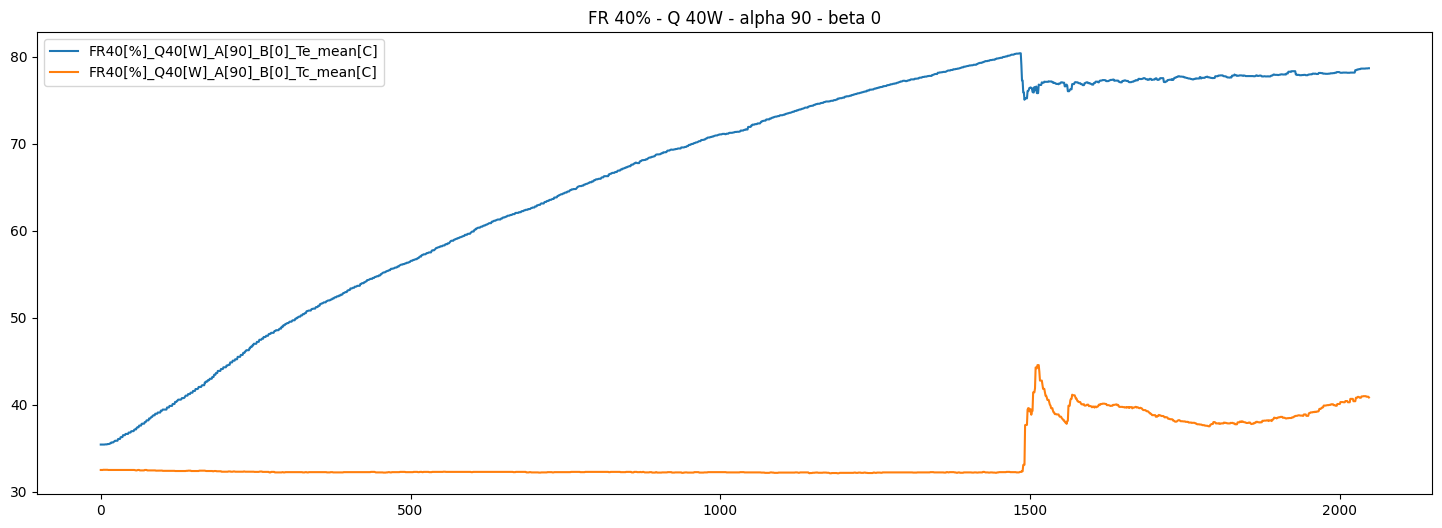

Q 60
alpha 90, beta 0


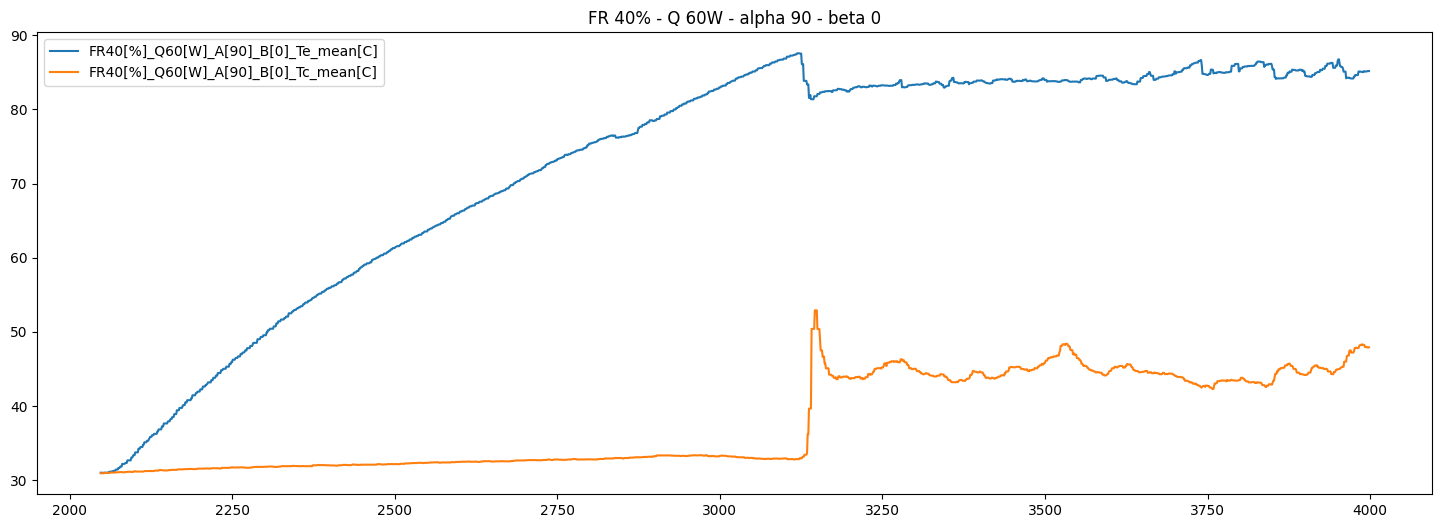

Q 80
alpha 90, beta 0


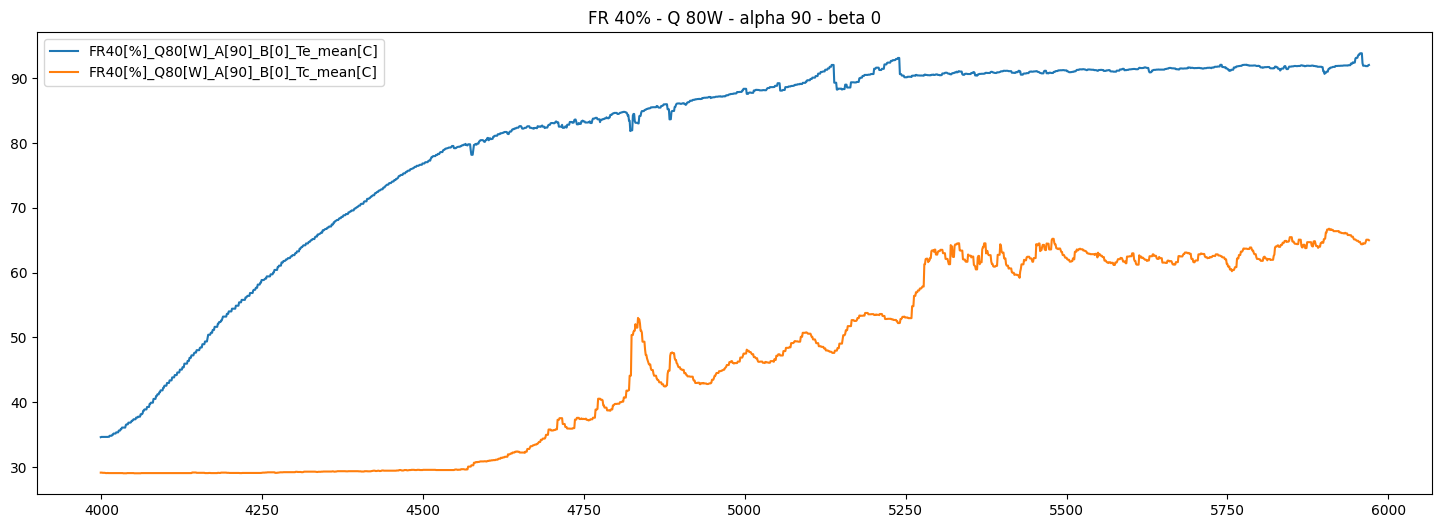

Q 100
alpha 90, beta 0


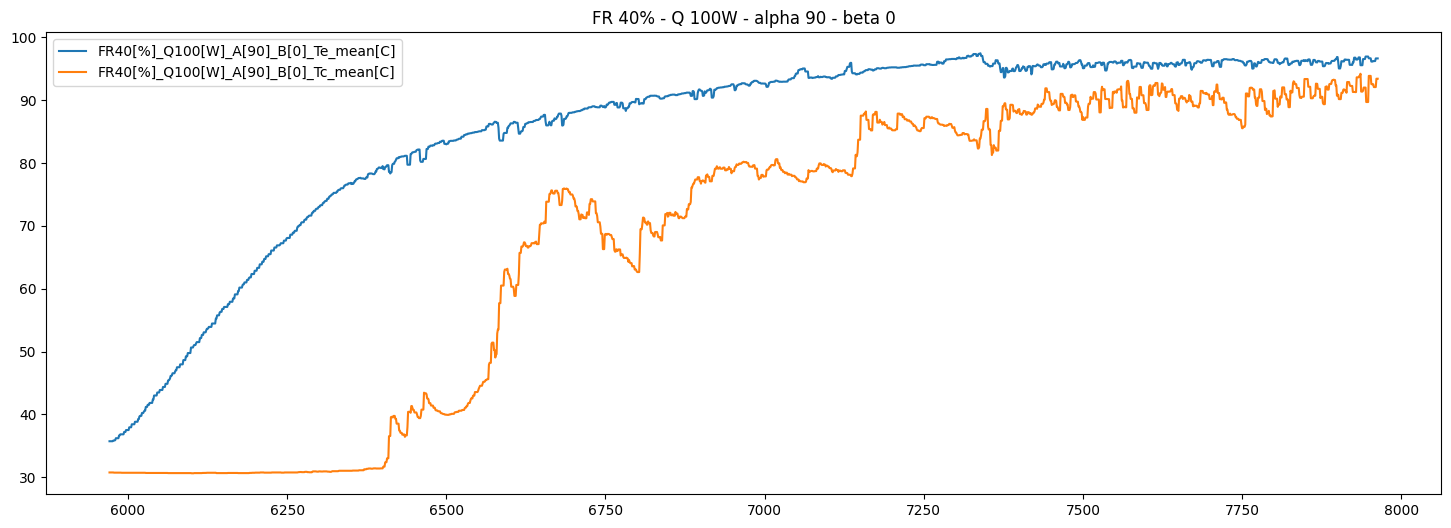

Q 120
alpha 90, beta 0


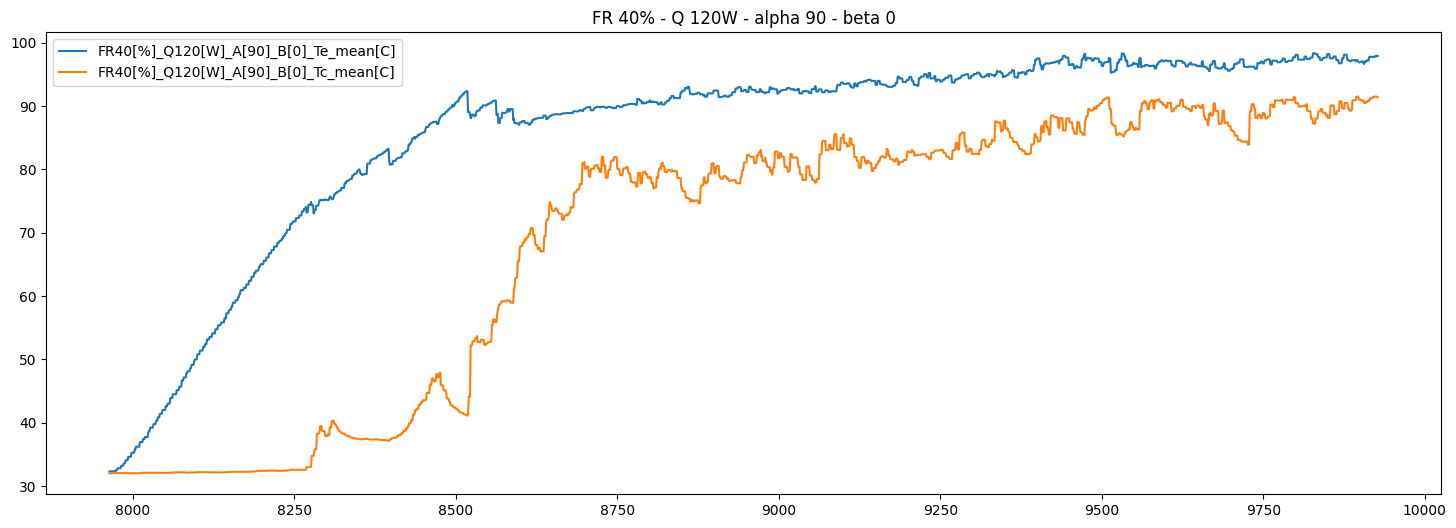

In [13]:
import matplotlib.pyplot as plt

# Assuming frs, qs, alphas, betas are defined and df is your DataFrame
plt.figure(figsize=(18, 9))
for fr in frs:
    print(f'FR {fr}')
    for q in qs:
        print(f'Q {q}')
        for a in alphas:
            for b in betas:
                print(f'alpha {a}, beta {b}')
                
                # Filter the dataframe
                df_ = df[(df['FR[%]'] == fr) & (df['Q[W]'] == q) & (df['alpha'] == a) & (df['beta'] == b)]
                
                if not df_.empty:
                    # Plotting
                    plt.figure(figsize=(18, 6))
                    plt.plot(df_['Te_mean[C]'], label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Te_mean[C]')
                    plt.plot(df_['Tc_mean[C]'], label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Tc_mean[C]')
                    plt.legend()
                    plt.title(f'FR {fr}% - Q {q}W - alpha {a} - beta {b}')
                    plt.show()


In [14]:
import pygwalker as pyg
from pygwalker.api.streamlit import StreamlitRenderer
import streamlit as st
from streamlit.components.v1 import components

In [15]:
df['TIME'] = pd.to_datetime(df['TIME'], format='%H:%M:%S')

In [16]:
st.set_page_config(page_title='Pulsating Heat Pipe - Data Visualization Dash-Board',)
st.title('PHP')

pyg_html = pyg.walk(dataset=df, return_html=True)


2024-07-25 15:27:51.519 
  command:

    streamlit run d:\Phd\php_pulsating_heat_pipe\Krp_Analysis\Advanced_PulseHeatPipe_krp\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


Box(children=(HTML(value='\n<div id="ifr-pyg-00061e0f6d8d0413n6Fx4IstJydB0WAM" style="height: auto">\n    <hea…

FR 40
Q 40
alpha 90, beta 0


<Figure size 1800x900 with 0 Axes>

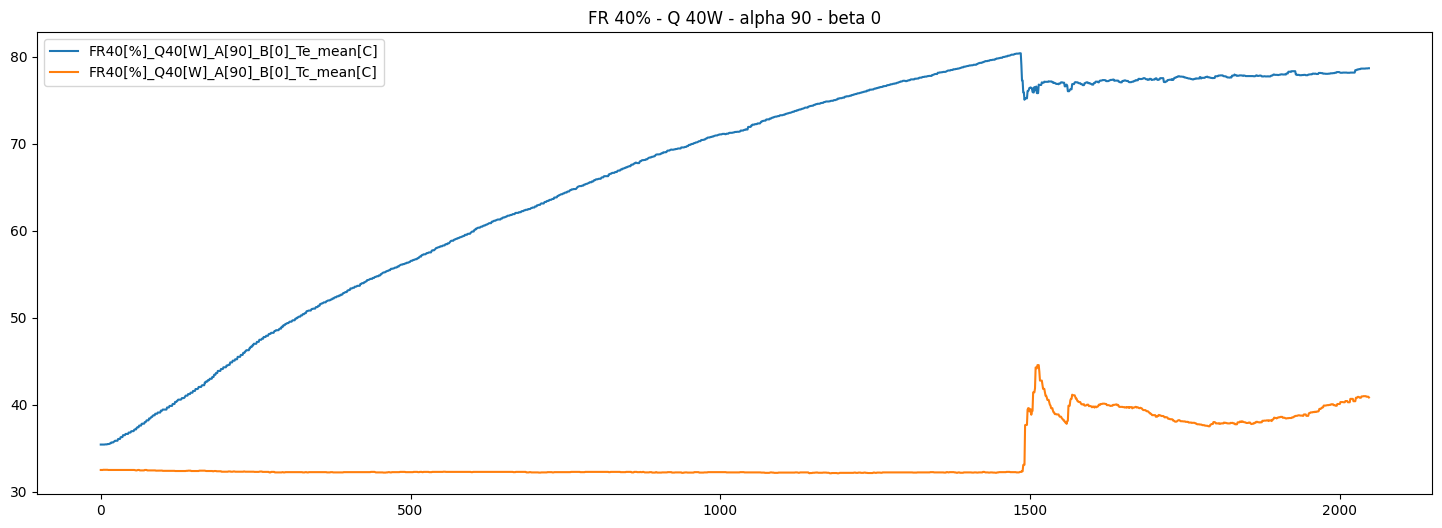

Q 60
alpha 90, beta 0


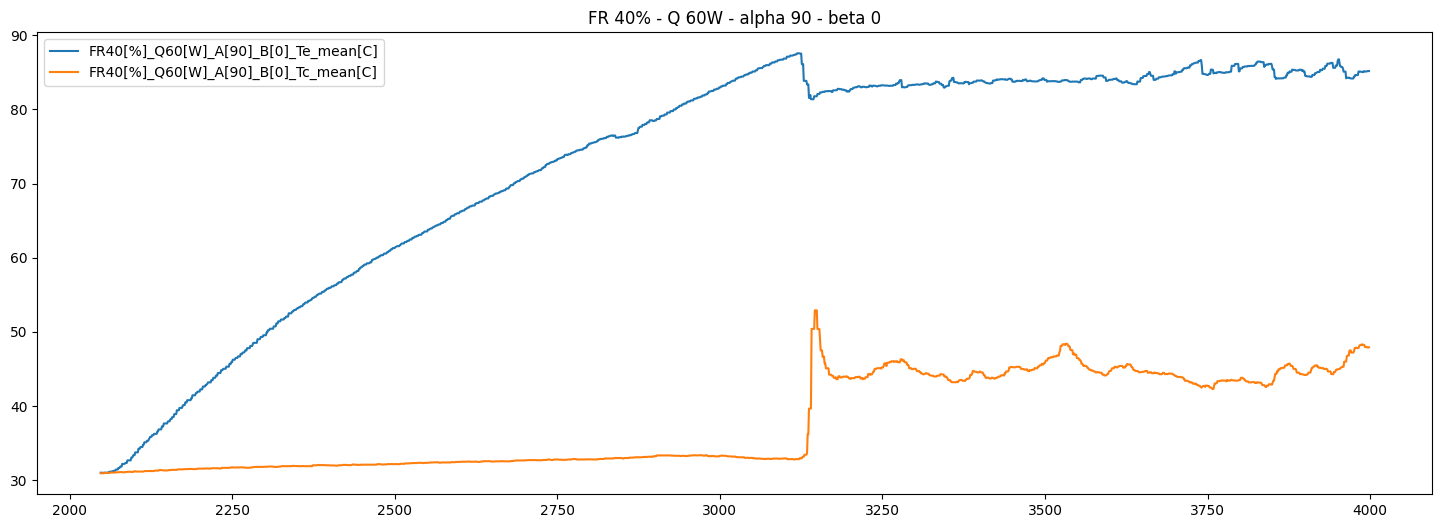

Q 80
alpha 90, beta 0


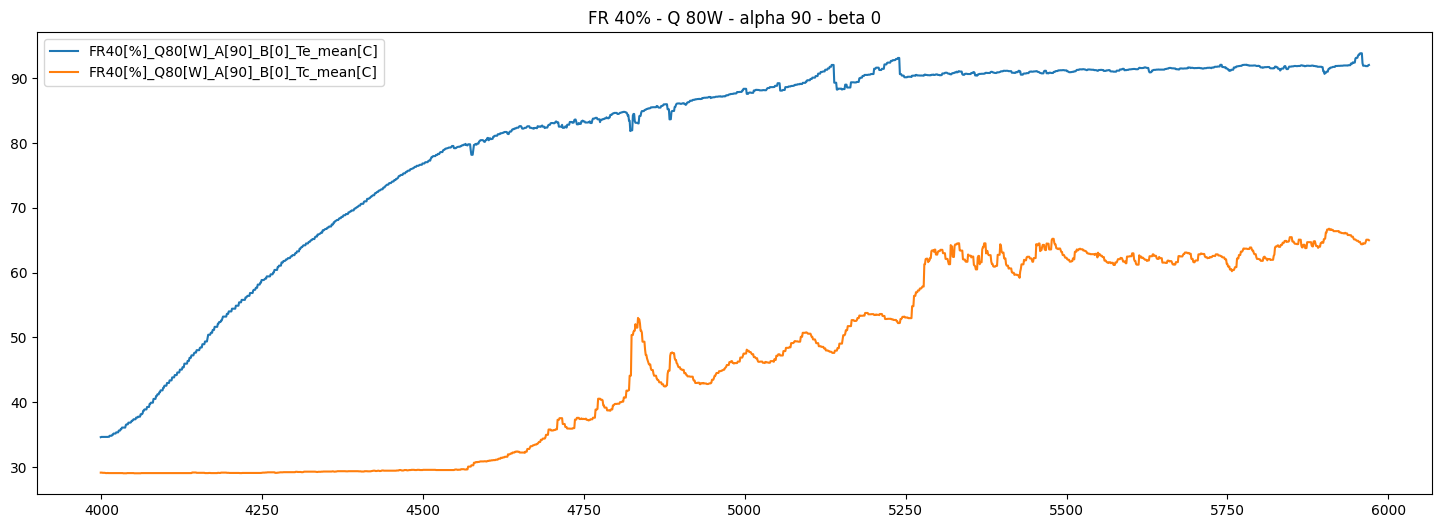

Q 100
alpha 90, beta 0


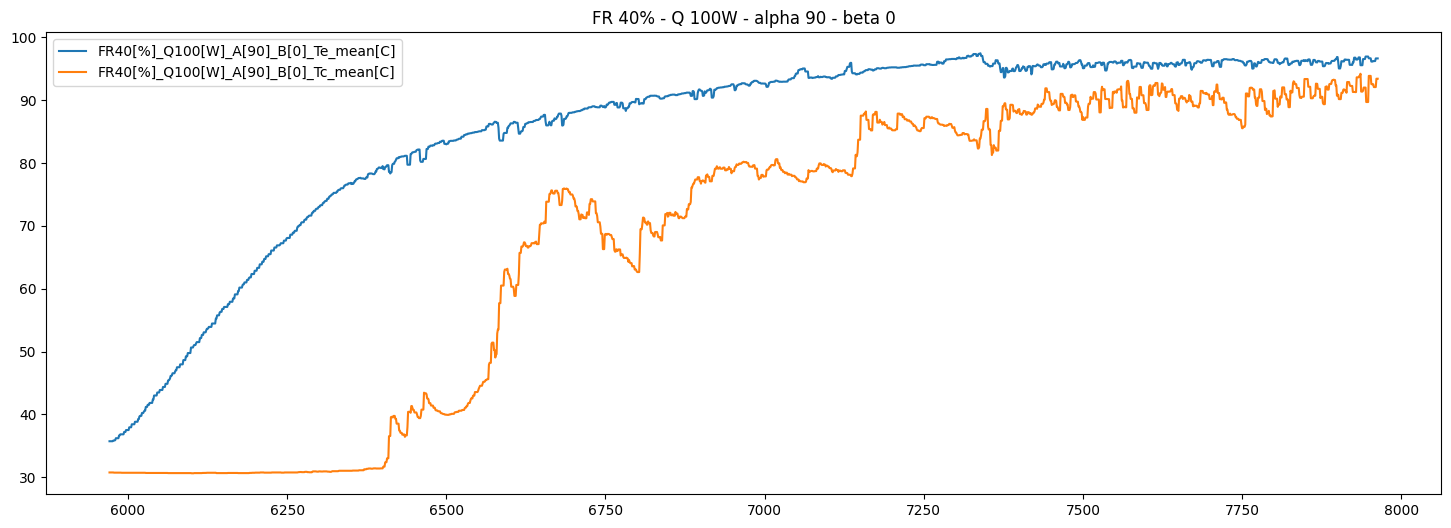

Q 120
alpha 90, beta 0


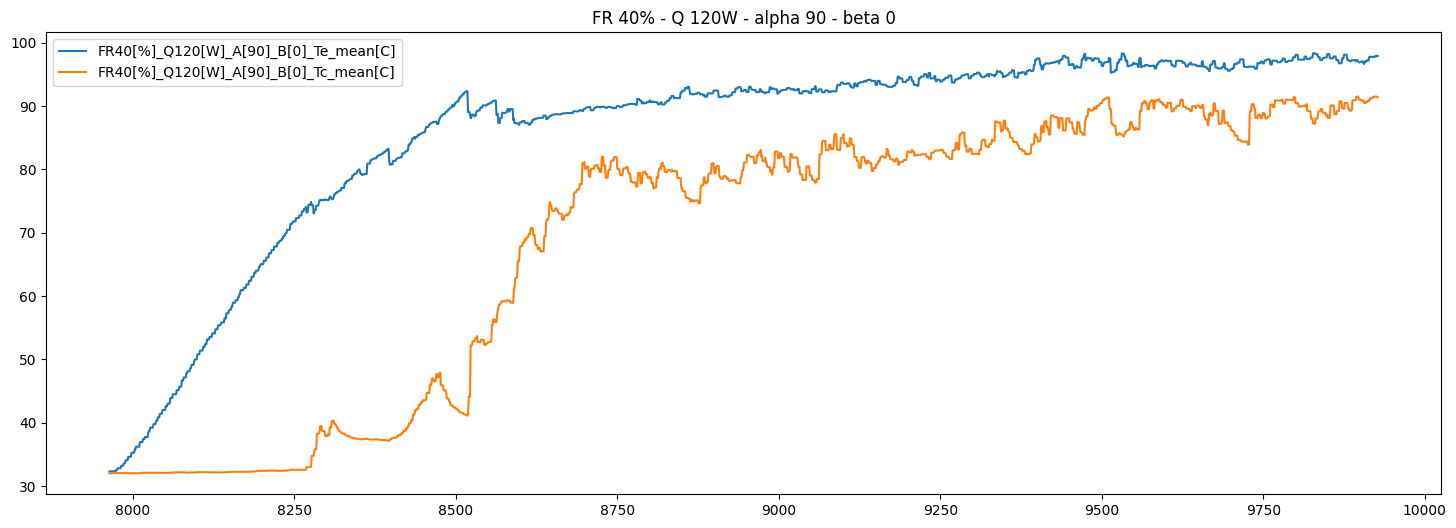

In [17]:
import matplotlib.pyplot as plt

# Assuming frs, qs, alphas, betas are defined and df is your DataFrame
plt.figure(figsize=(18, 9))
for fr in frs:
    print(f'FR {fr}')
    for q in qs:
        print(f'Q {q}')
        for a in alphas:
            for b in betas:
                print(f'alpha {a}, beta {b}')
                
                # Filter the dataframe
                df_ = df[(df['FR[%]'] == fr) & (df['Q[W]'] == q) & (df['alpha'] == a) & (df['beta'] == b)]
                
                if not df_.empty:
                    # Plotting
                    plt.figure(figsize=(18, 6))
                    plt.plot(df_['Te_mean[C]'], label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Te_mean[C]')
                    plt.plot(df_['Tc_mean[C]'], label=f'FR{fr}[%]_Q{q}[W]_A[{a}]_B[{b}]_Tc_mean[C]')
                    plt.legend()
                    plt.title(f'FR {fr}% - Q {q}W - alpha {a} - beta {b}')
                    plt.show()


In [18]:
pulse_time = db['pulse'].unique()

In [19]:
for time in pulse_time:
    db_pt = db[db['TIME']==time]
    Te_pt = db_pt['Te_mean[K]'].min()
    Tc_pt = db_pt['Tc_mean[K]'].min()
    print(Te_pt, Tc_pt)

nan nan


In [20]:
db['pulse'] = pd.to_datetime(db['pulse'])
db['TIME'] = pd.to_datetime(db['TIME'])

C:\Users\MSI (WIN10)\AppData\Local\Temp\ipykernel_7404\3001641875.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  db['TIME'] = pd.to_datetime(db['TIME'])


In [21]:
db

,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,...,P[bar],Te_mean[K],Tc_mean[K],Te_std[K],Tc_std[K],T_pulse[K],TR[K/W],GFE_Te[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,2024-07-25 14:20:49,04/06/2024,35.5,35.7,35.2,35.2,35.5,33.4,33.1,33.1,...,0.37,308.57,305.65,273.37,274.56,0.0,0.07,-2563.12,-2538.87,-24.25
1,2024-07-25 14:20:51,04/06/2024,35.5,35.7,35.2,35.2,35.5,33.4,33.1,33.1,...,0.37,308.57,305.65,273.37,274.56,0.0,0.07,-2563.12,-2538.87,-24.25
2,2024-07-25 14:20:52,04/06/2024,35.5,35.7,35.2,35.2,35.5,33.4,33.1,33.1,...,0.37,308.57,305.65,273.37,274.56,0.0,0.07,-2563.12,-2538.87,-24.25
3,2024-07-25 14:20:54,04/06/2024,35.5,35.7,35.2,35.2,35.5,33.4,33.1,33.1,...,0.37,308.57,305.65,273.37,274.56,0.0,0.07,-2563.12,-2538.87,-24.25
4,2024-07-25 14:20:55,04/06/2024,35.5,35.7,35.2,35.2,35.5,33.4,33.1,33.1,...,0.37,308.57,305.67,273.37,274.51,0.0,0.07,-2563.12,-2539.08,-24.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9923,2024-07-25 11:19:50,04/09/2024,95.9,99.3,99.7,97.0,97.2,82.8,91.1,91.3,...,1.79,370.97,364.67,274.77,280.55,0.0,0.05,1761.02,1731.14,29.88
9924,2024-07-25 11:19:57,04/09/2024,95.9,99.3,99.7,97.0,97.2,82.8,91.1,91.2,...,1.80,370.97,364.65,274.77,280.55,0.0,0.05,1778.18,1747.88,30.29
9925,2024-07-25 11:19:58,04/09/2024,95.9,99.6,99.8,97.3,97.2,82.8,91.1,91.2,...,1.80,371.11,364.65,274.83,280.55,0.0,0.05,1778.85,1747.88,30.96
9926,2024-07-25 11:19:59,04/09/2024,95.9,99.6,99.8,97.3,97.0,82.6,91.0,91.2,...,1.80,371.07,364.58,274.86,280.63,0.0,0.05,1778.66,1747.52,31.13
